## Week 6 homework
# Sage Madden
# 10/28/2021

In [8]:
# Import libraries
import pandas as pd
from dplython import (DplyFrame, X, diamonds, select, sift,
  sample_n, sample_frac, head, arrange, mutate, group_by,
  summarize, DelayFunction)
import numpy as np
import plotnine as p9
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap
# Plotnine is ggplot in python
# I'm not sure why I need both the "import plotnine" and "from plotnine" lines but I run into errors if I don't have both

In [2]:
# Read in data
gapminder = DplyFrame(pd.read_csv("https://gge-ucd.github.io/R-DAVIS/data/gapminder.csv"))

# View the first few rows
print(gapminder.head)

# View the column names
print(gapminder.columns)


<bound method NDFrame.head of           country  year         pop continent  lifeExp   gdpPercap
0     Afghanistan  1952   8425333.0      Asia   28.801  779.445314
1     Afghanistan  1957   9240934.0      Asia   30.332  820.853030
2     Afghanistan  1962  10267083.0      Asia   31.997  853.100710
3     Afghanistan  1967  11537966.0      Asia   34.020  836.197138
4     Afghanistan  1972  13079460.0      Asia   36.088  739.981106
...           ...   ...         ...       ...      ...         ...
1699     Zimbabwe  1987   9216418.0    Africa   62.351  706.157306
1700     Zimbabwe  1992  10704340.0    Africa   60.377  693.420786
1701     Zimbabwe  1997  11404948.0    Africa   46.809  792.449960
1702     Zimbabwe  2002  11926563.0    Africa   39.989  672.038623
1703     Zimbabwe  2007  12311143.0    Africa   43.487  469.709298

[1704 rows x 6 columns]>
Index(['country', 'year', 'pop', 'continent', 'lifeExp', 'gdpPercap'], dtype='object')


First calculates mean life expectancy on each continent. Then create a plot that shows how life expectancy has changed over time in each continent. Try to do this all in one step using pipes! (aka, try not to create intermediate dataframes)
Challenge! Modify the above code to size the points in proportion to the population of the country. Hint: Are you translating data to a visual feature of the plot?

<bound method NDFrame.head of           country  year         pop continent  lifeExp   gdpPercap  \
0     Afghanistan  1952   8425333.0      Asia   28.801  779.445314   
1     Afghanistan  1957   9240934.0      Asia   30.332  820.853030   
2     Afghanistan  1962  10267083.0      Asia   31.997  853.100710   
3     Afghanistan  1967  11537966.0      Asia   34.020  836.197138   
4     Afghanistan  1972  13079460.0      Asia   36.088  739.981106   
...           ...   ...         ...       ...      ...         ...   
1699     Zimbabwe  1987   9216418.0    Africa   62.351  706.157306   
1700     Zimbabwe  1992  10704340.0    Africa   60.377  693.420786   
1701     Zimbabwe  1997  11404948.0    Africa   46.809  792.449960   
1702     Zimbabwe  2002  11926563.0    Africa   39.989  672.038623   
1703     Zimbabwe  2007  12311143.0    Africa   43.487  469.709298   

      meanLifeExp_x  meanLifeExp_y  meanLifeExp_x  meanLifeExp_y  
0         60.064903      60.064903      60.064903      60.0649

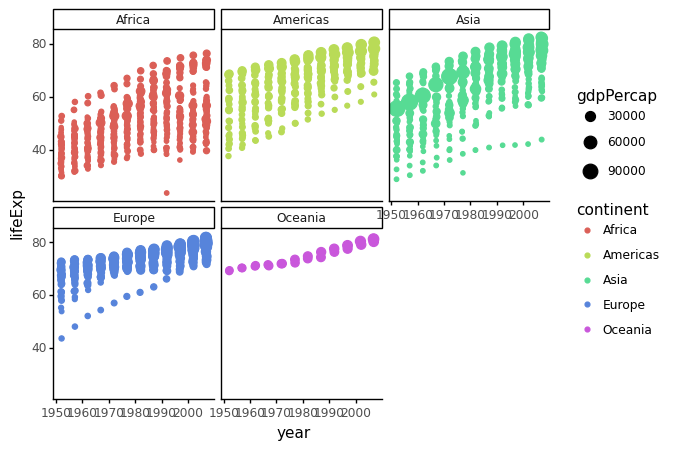

<ggplot: (-9223371887279512936)>

In [9]:
# Calculate mean life expectancy for each column. To do this I will use group_by and summarize
# Then add that to the main df with all the other columns I want
gapminder = gapminder.merge(gapminder >> group_by(X.continent) >> summarize(meanLifeExp = X.lifeExp.mean()), left_on = ["continent"], 
                                 right_on = ["continent"], how = "left")
print(gapminder.head)

# Create a plot showing how life expectancy has changed over time in each continent 
# Points sized in proportion to country population size
(p9.ggplot(data = gapminder,
           mapping = p9.aes(y = "lifeExp", x = "year", color = "continent"))
 + p9.geom_jitter(mapping = aes(size = "gdpPercap"), width = 0.2) 
 + p9.facet_wrap("continent") # Added this for visibility
 + p9.theme_classic()
)

# I tried piping into ggplot but it did not work...maybe pipes don't work the same way in python?

Look at the following code and answer the following questions. What do you think the scale_x_log10() line of code is achieving? What about the geom_smooth() line of code?

Answer: the scale_x_log10() converts the values of the variable on the x-axis to a log 10 scale. The geom_smooth() creates a line showing the plot's pattern. In this case, the formula "lm" is used, which means the line is straight (linear relationship). The gray bar around the line is some measure of error, I think. In this case, there is only one line and error bar across all continents (I think because continents is only in the mapping for geom_point(), not ggplot(). 

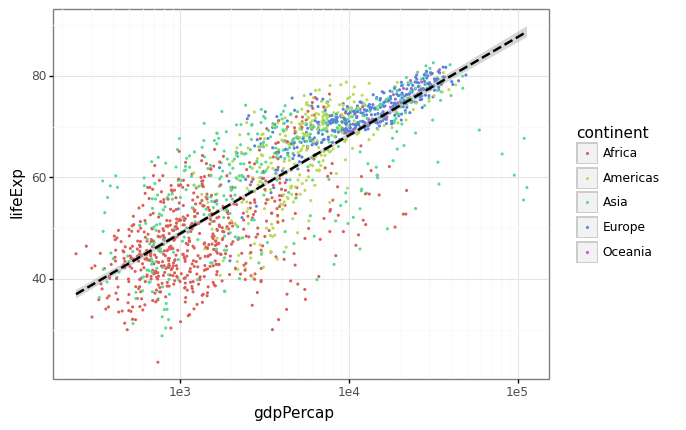

<ggplot: (-9223371887278868148)>

In [13]:
# Python version of provided code
(p9.ggplot(data = gapminder,
           mapping = p9.aes(x = "gdpPercap", y = "lifeExp"))
 + p9.geom_point(aes(color = "continent"), size = 0.25)
 + p9.scale_x_log10()
 + p9.geom_smooth(method = "lm", color = "black", linetype = "dashed")
 + p9.theme_bw() # Theme_classic is better than theme_bw...prove me wrong
)

Create a boxplot that shows the life expectency for Brazil, China, El Salvador, Niger, and the United States, with the data points in the backgroud using geom_jitter. Label the X and Y axis with “Country” and “Life Expectancy” and title the plot “Life Expectancy of Five Countries”.

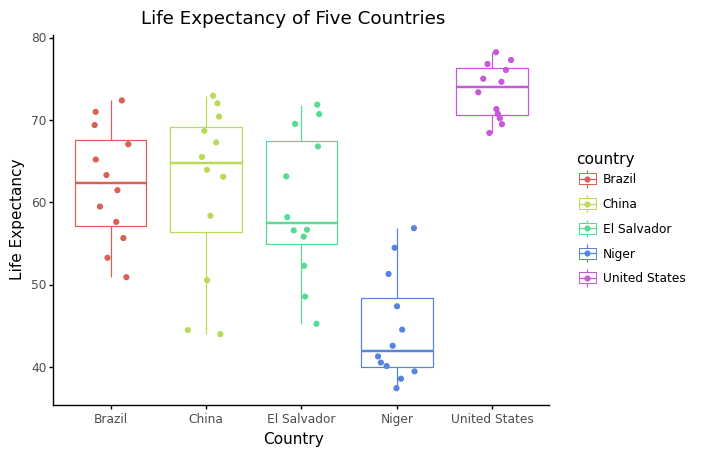

<ggplot: (-9223371887278968352)>

In [12]:
# Create a new df with only the five countries I want 
country_subset = gapminder >> sift((X.country == "Brazil") | (X.country == "China") | (X.country == "El Salvador") 
                                   | (X.country == "Niger") | (X.country == "United States"))


# Create the plot showing life expectancy for the five countries
(p9.ggplot(data = country_subset,
           mapping = p9.aes(x = "country", y = "lifeExp", color = "country"))
 + p9.geom_jitter(width = 0.2)
 + p9.geom_boxplot(alpha = 0) 
 + p9.labs(x = "Country", y = "Life Expectancy", title = "Life Expectancy of Five Countries")
 + p9.theme_classic()
)